In [1]:
import os
import drjit
gpu_num = [0, 1, 2, 3] # Use "" to use the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sionna
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
tf.get_logger().setLevel('ERROR')
# tf.config.run_functions_eagerly(True)

from jammer.simulation_model import *
import jammer.simulation_model as sim
from tensorflow.python.keras.losses import MeanAbsoluteError, MeanSquaredError, BinaryCrossentropy

In [2]:
# common parameters
model_parameters = {}
jammer_parameters = {}
model_parameters["perfect_csi"] = False
model_parameters["num_ut"] = 1
model_parameters["jammer_present"] = True
model_parameters["jammer_power"] = 1.0
model_parameters["jammer_mitigation"] = "pos"
model_parameters["jammer_mitigation_dimensionality"] = 1
model_parameters["num_silent_pilot_symbols"] = 4
jammer_parameters["trainable"] = True
model_parameters["jammer_parameters"] = jammer_parameters

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 3.3797e-01 | 1.0000e+00 |     1245881 |     3686400 |         1600 |        1600 |        13.6 |reached max iter       
   -3.571 | 3.3444e-01 | 1.0000e+00 |     1232888 |     3686400 |         1600 |        1600 |         8.1 |reached max iter       
   -2.143 | 3.3146e-01 | 1.0000e+00 |     1221882 |     3686400 |         1600 |        1600 |         8.1 |reached max iter       
   -0.714 | 3.3001e-01 | 1.0000e+00 |     1216560 |     3686400 |         1600 |        1600 |         8.1 |reached max iter       
    0.714 | 3.2733e-01 | 1.0000e+00 |     1206677 |     3686400 |         1600 |        1600 |         8.1 |reached max iter       
    2.143 | 3.2636e-01 | 1.0000e+00 |     1203087 |     3686400 |         1600 |     

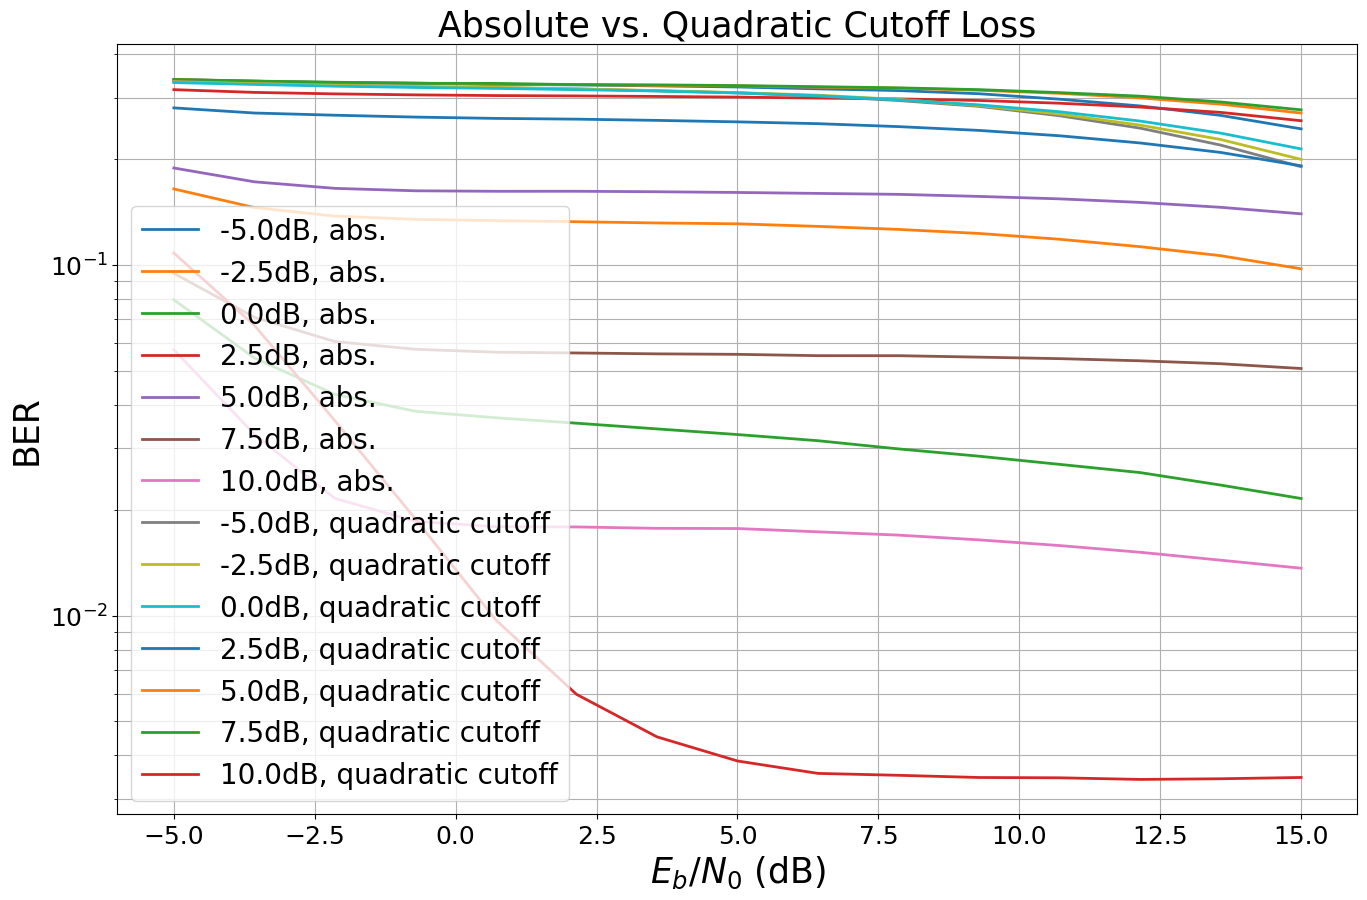

In [6]:
ber_plots.reset()
sim.MAX_MC_ITER = 100
sim.BATCH_SIZE = 16
jammer_parameters["trainable"] = False
jammer_parameters["trainable_mask"] = tf.ones([14, 128])
snrs = np.arange(-5.0, 10.5, 2.5)
for snr in snrs:
    filename = f"weights/{snr}dB_relufix.pickle"
    model = Model(**model_parameters)
    load_weights(model, filename)
    simulate_model(model, f"{snr}dB, abs.")
for snr in snrs:
    filename = f"weights/{snr}dB_quadratic.pickle"
    model = Model(**model_parameters)
    load_weights(model, filename)
    simulate_model(model, f"{snr}dB, quadratic cutoff")
ber_plots.title = "Absolute vs. Quadratic Cutoff Loss"
ber_plots()

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 3.3855e-01 | 1.0000e+00 |     1248014 |     3686400 |         1600 |        1600 |        13.7 |reached max iter       
   -3.571 | 3.3444e-01 | 1.0000e+00 |     1232877 |     3686400 |         1600 |        1600 |         7.9 |reached max iter       
   -2.143 | 3.3176e-01 | 1.0000e+00 |     1222988 |     3686400 |         1600 |        1600 |         8.0 |reached max iter       
   -0.714 | 3.2946e-01 | 1.0000e+00 |     1214514 |     3686400 |         1600 |        1600 |         8.0 |reached max iter       
    0.714 | 3.2750e-01 | 1.0000e+00 |     1207304 |     3686400 |         1600 |        1600 |         8.0 |reached max iter       
    2.143 | 3.2634e-01 | 1.0000e+00 |     1203025 |     3686400 |         1600 |     

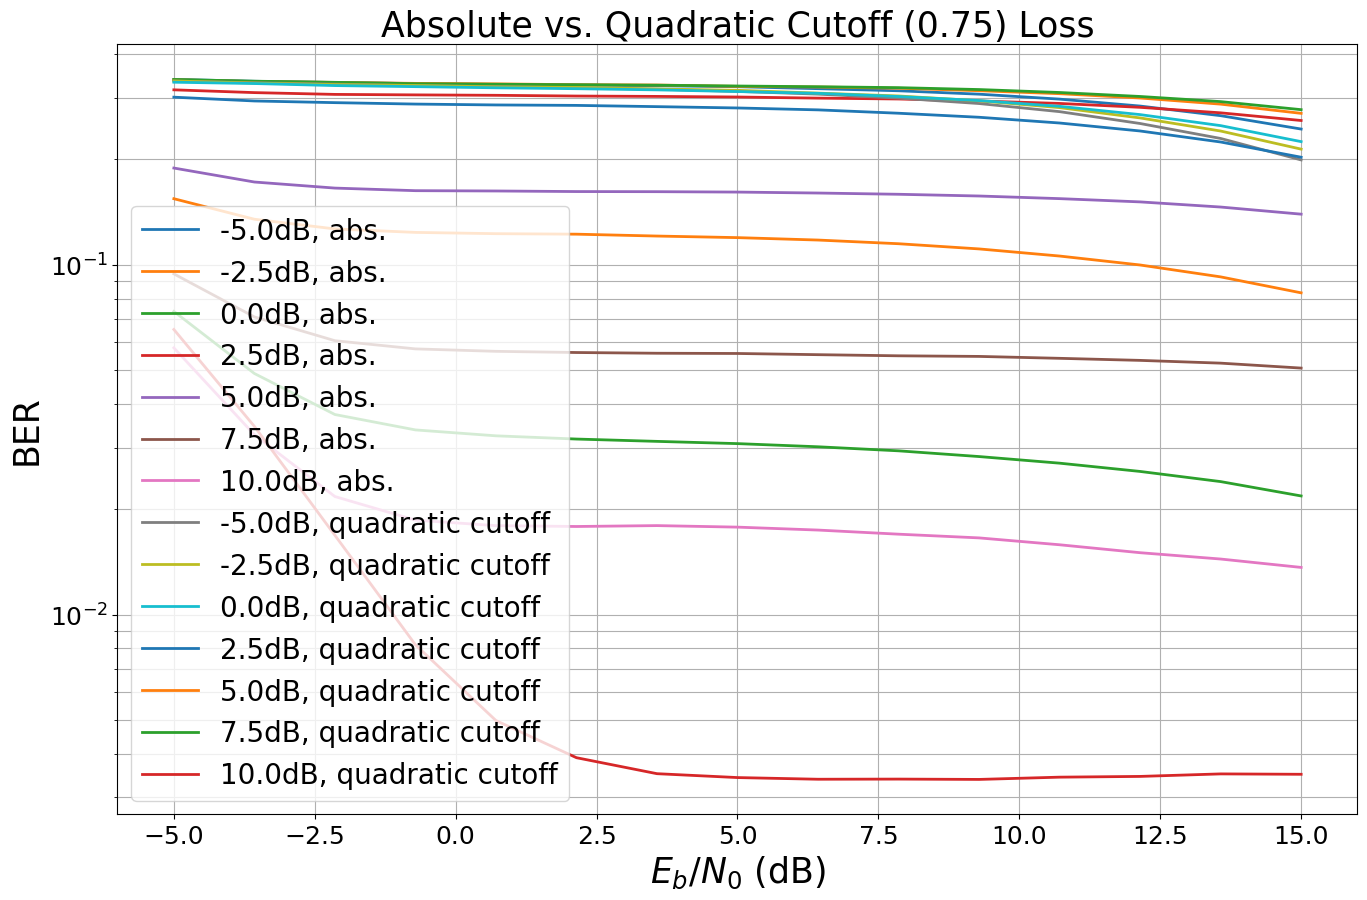

In [4]:
ber_plots.reset()
sim.MAX_MC_ITER = 100
sim.BATCH_SIZE = 16
jammer_parameters["trainable"] = False
jammer_parameters["trainable_mask"] = tf.ones([14, 128])
snrs = np.arange(-5.0, 10.5, 2.5)
for snr in snrs:
    filename = f"weights/{snr}dB_relufix.pickle"
    model = Model(**model_parameters)
    load_weights(model, filename)
    simulate_model(model, f"{snr}dB, abs.")
for snr in snrs:
    filename = f"weights/{snr}dB_quadratic_0.75co.pickle"
    model = Model(**model_parameters)
    load_weights(model, filename)
    simulate_model(model, f"{snr}dB, quadratic cutoff")
ber_plots.title = "Absolute vs. Quadratic Cutoff (0.75) Loss"
ber_plots()

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 3.3826e-01 | 1.0000e+00 |     1246949 |     3686400 |         1600 |        1600 |        14.8 |reached max iter       
   -3.571 | 3.3483e-01 | 1.0000e+00 |     1234322 |     3686400 |         1600 |        1600 |         8.1 |reached max iter       
   -2.143 | 3.3200e-01 | 1.0000e+00 |     1223886 |     3686400 |         1600 |        1600 |         8.6 |reached max iter       
   -0.714 | 3.3000e-01 | 1.0000e+00 |     1216515 |     3686400 |         1600 |        1600 |         8.5 |reached max iter       
    0.714 | 3.2821e-01 | 1.0000e+00 |     1209930 |     3686400 |         1600 |        1600 |         8.4 |reached max iter       
    2.143 | 3.2576e-01 | 1.0000e+00 |     1200874 |     3686400 |         1600 |     

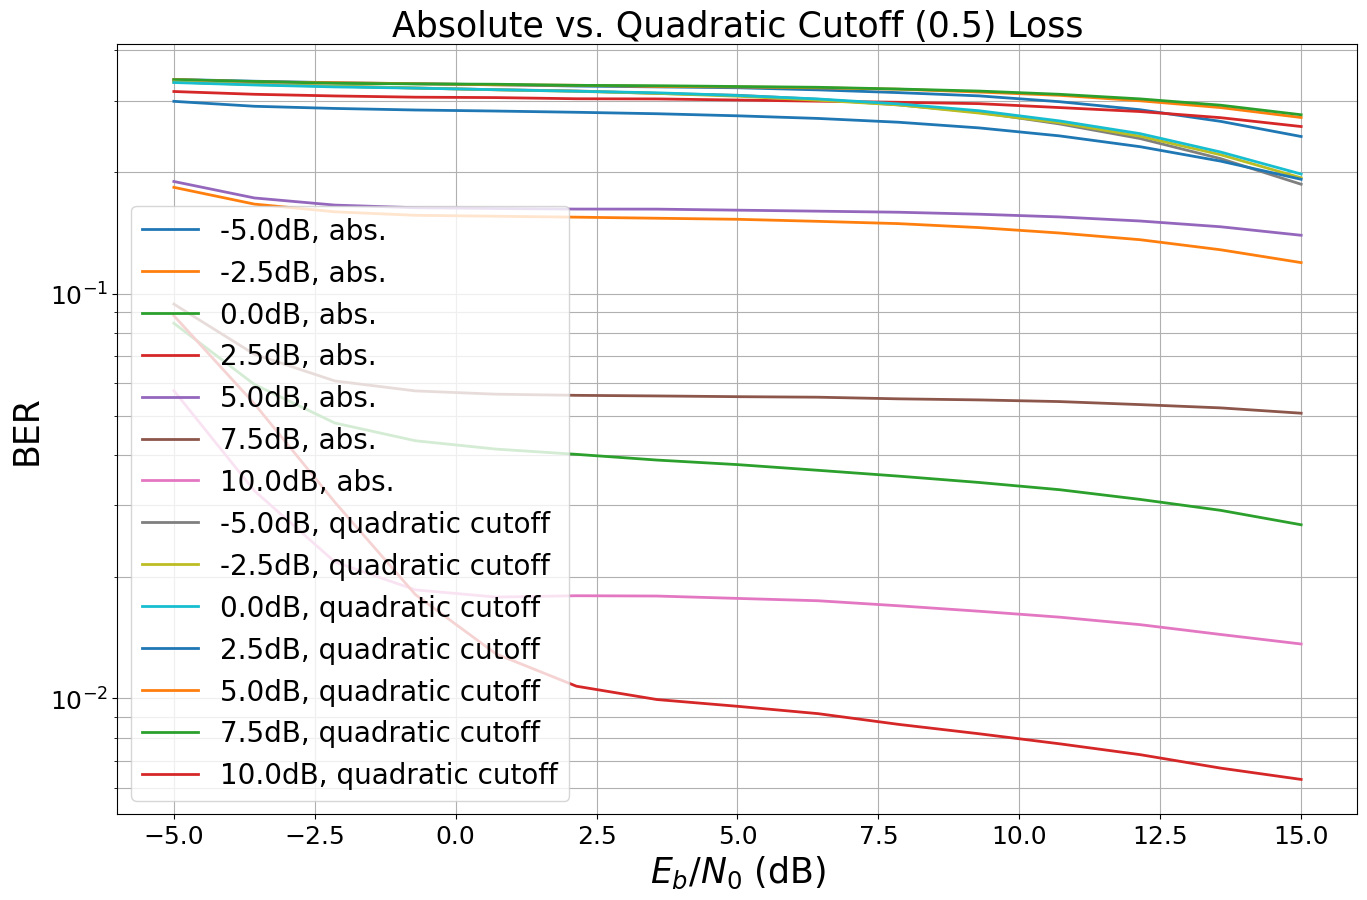

In [3]:
ber_plots.reset()
sim.MAX_MC_ITER = 100
sim.BATCH_SIZE = 16
jammer_parameters["trainable"] = False
jammer_parameters["trainable_mask"] = tf.ones([14, 128])
snrs = np.arange(-5.0, 10.5, 2.5)
for snr in snrs:
    filename = f"weights/{snr}dB_relufix.pickle"
    model = Model(**model_parameters)
    load_weights(model, filename)
    simulate_model(model, f"{snr}dB, abs.")
for snr in snrs:
    filename = f"weights/{snr}dB_quadratic_0.5co.pickle"
    model = Model(**model_parameters)
    load_weights(model, filename)
    simulate_model(model, f"{snr}dB, quadratic cutoff")
ber_plots.title = "Absolute vs. Quadratic Cutoff (0.5) Loss"
ber_plots()